In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [61]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [63]:
#Cleaning Data 1: Check if there is duplicated data

In [64]:
df.duplicated().describe()

count      1000
unique        1
top       False
freq       1000
dtype: object

In [65]:
#Cleaning Data 2: Check if there is abnormal empty cell that may cause erro

In [66]:
df['Churned'].describe()

count    1000.000000
mean        0.246000
std         0.430894
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churned, dtype: float64

In [67]:
print(df['Churned'].astype(object).describe())

count     1000
unique       2
top          0
freq       754
Name: Churned, dtype: int64


In [68]:
churned =df[df['Churned']!=0]
df['Churned'][churned.index].astype(object).describe()

count     246
unique      1
top         1
freq      246
Name: Churned, dtype: int64

In [69]:
#Cleaning Data 3: Check if any invalid data for rating

In [70]:
df['Rating_Given'].astype(object).describe()


count     1000
unique       5
top          2
freq       212
Name: Rating_Given, dtype: int64

In [71]:
print(df[df['Rating_Given']>5].empty)
print(df[df['Rating_Given']<1].empty)

True
True


In [72]:
# Cleaning Data 4: Convert Subscription_Start_Date from string to date, Check if all date are valid

In [73]:
import datetime as dt
today = dt.date.today()
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date']).dt.date
df[df['Subscription_Start_Date'] > today].empty

True

In [74]:
df['Payment_Method'].describe()

count            1000
unique              3
top       Credit Card
freq              613
Name: Payment_Method, dtype: object

In [75]:
df['Subscription_Type'].describe()

count         1000
unique           3
top       Standard
freq           530
Name: Subscription_Type, dtype: object

In [76]:
df['Favorite_Genre'].describe()

count      1000
unique        5
top       Drama
freq        212
Name: Favorite_Genre, dtype: object

Text(0.5, 1.0, 'Monthly Fee')

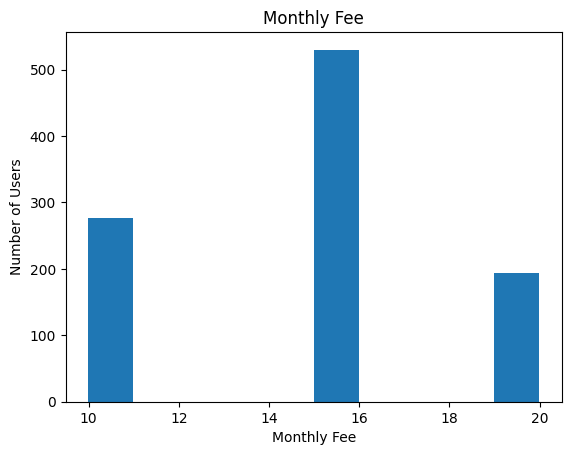

In [77]:
plt.hist(df['Monthly_Payment'])
plt.xlabel('Monthly Fee')
plt.ylabel('Number of Users')
plt.title('Monthly Fee')

In [78]:
# Create new dataframs for observation

In [84]:
df_churned = churned.copy()
df_churned.info()
df_churned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 12 to 998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  246 non-null    int64  
 1   Age                      246 non-null    int64  
 2   Gender                   246 non-null    object 
 3   Location                 246 non-null    object 
 4   Subscription_Start_Date  246 non-null    object 
 5   Subscription_Type        246 non-null    object 
 6   Monthly_Payment          246 non-null    float64
 7   Payment_Method           246 non-null    object 
 8   Monthly_Hours_Watched    246 non-null    float64
 9   Favorite_Genre           246 non-null    object 
 10  Devices_Used             246 non-null    object 
 11  Average_Session_Length   246 non-null    float64
 12  Content_ID               246 non-null    int64  
 13  Rating_Given             246 non-null    int64  
 14  Churned                  246 n

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
12,13,41,Other,North,2021-04-22 01:53:37.657108,Standard,14.99,Direct Debit,14.011035,Sci-Fi,Mobile,0.152133,1059,5,1,2021-06-13 01:53:37.657108,Found better service
13,14,70,Other,South,2020-10-29 01:53:37.657119,Standard,14.99,Direct Debit,35.339461,Sci-Fi,Mobile,3.346005,1011,2,1,2021-03-11 01:53:37.657119,Found better service
14,15,53,Other,East,2023-10-06 01:53:37.657130,Standard,14.99,Credit Card,14.191293,Documentary,Mobile,2.791956,1020,1,1,2024-07-02 01:53:37.657130,Price increase
16,17,41,Other,South,2019-07-27 01:53:37.657151,Premium,19.99,Credit Card,12.991876,Drama,Mobile,2.519855,1043,1,1,2020-03-16 01:53:37.657151,Found better service
29,30,39,Male,North,2019-11-05 01:53:37.657296,Standard,14.99,Credit Card,22.258651,Comedy,Mobile,0.838116,1034,2,1,2020-08-13 01:53:37.657296,Price increase


In [83]:
df_stay = df[df['Churned']==0].drop(columns=['Churned','Date_of_Churn','Reason_for_Churn'])
df_stay.info()
df_stay.head()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  754 non-null    int64  
 1   Age                      754 non-null    int64  
 2   Gender                   754 non-null    object 
 3   Location                 754 non-null    object 
 4   Subscription_Start_Date  754 non-null    object 
 5   Subscription_Type        754 non-null    object 
 6   Monthly_Payment          754 non-null    float64
 7   Payment_Method           754 non-null    object 
 8   Monthly_Hours_Watched    754 non-null    float64
 9   Favorite_Genre           754 non-null    object 
 10  Devices_Used             754 non-null    object 
 11  Average_Session_Length   754 non-null    float64
 12  Content_ID               754 non-null    int64  
 13  Rating_Given             754 non-null    int64  
dtypes: float64(3), int64(4), object

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given
0,1,56,Other,Central,2020-06-07,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5
1,2,69,Other,West,2024-02-21,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1
2,3,46,Female,North,2022-10-06,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2
3,4,32,Female,East,2022-01-04,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1
4,5,60,Female,North,2020-03-13,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4


In [82]:
#Draw histograms 

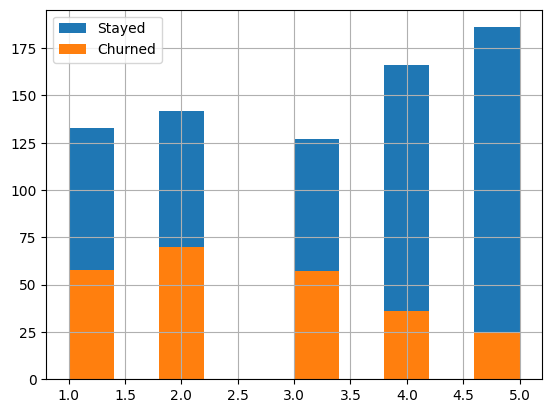

In [85]:
df[df['Churned']==0]['Rating_Given'].hist()
df[df['Churned']==1]['Rating_Given'].hist()
plt.legend(['Stayed','Churned'])
plt.show()